In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [5]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [6]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	4
float64		column 3	3
float64		column 4	4
float64		column 5	1
float64		column 6	4
float64		column 7	3
float64		column 8	2
float64		column 9	3
float64		column 10	1
float64		column 11	5
float64		column 12	3


In [7]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,397.000000,396.000000,397.000000,396.000000,399.000000,396.000000,397.000000,398.000000,397.000000,399.000000,395.000000,397.000000
mean,-0.103815,0.085559,2.026386,1.908522,1.939501,1.991481,2.027928,1.976255,1.957184,2.027485,1.966100,1.963843
std,2.573498,2.766264,1.127170,1.146668,1.162197,1.141559,1.157855,1.140224,1.142634,1.159282,1.151128,1.194565
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.705950,-0.791275,1.119200,0.955030,0.881030,1.045725,1.022500,1.022200,0.996580,1.031300,0.913930,0.907400
50%,-0.072087,0.040900,2.084100,1.792600,1.927000,2.031600,2.100400,1.954800,2.065300,2.087700,1.907100,1.936400
75%,0.770650,0.918948,2.966800,2.836900,2.973200,2.969325,2.972100,3.011725,2.925800,3.044600,2.965850,3.008000
max,8.409300,6.777100,3.951500,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

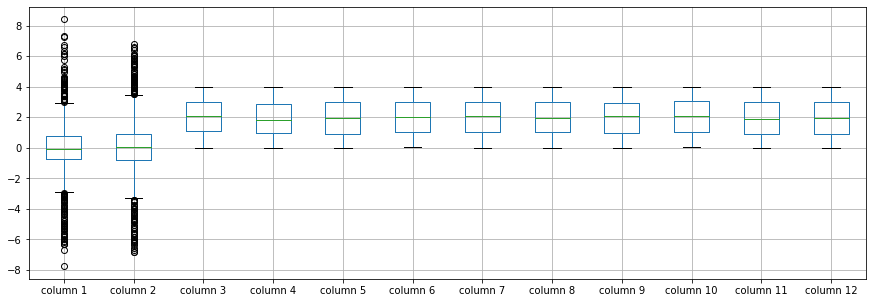

In [8]:
df.boxplot(return_type='axes', figsize=(15,5))

In [9]:
df.mean()

column 1    -0.103815
column 2     0.085559
column 3     2.026386
column 4     1.908522
column 5     1.939501
column 6     1.991481
column 7     2.027928
column 8     1.976255
column 9     1.957184
column 10    2.027485
column 11    1.966100
column 12    1.963843
dtype: float64

In [10]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.019127,-0.046788,-0.070326,0.006443,-0.001027,-0.014830,0.043283,-0.017694,0.045650,0.080645,-0.020362
column 2,0.019127,1.000000,-0.042566,0.029075,-0.088491,-0.079460,0.017772,-0.018868,-0.010566,0.008590,-0.026152,0.068442
column 3,-0.046788,-0.042566,1.000000,0.006127,-0.040719,-0.060271,-0.074981,0.083310,0.104297,-0.035417,-0.105241,-0.000402
column 4,-0.070326,0.029075,0.006127,1.000000,-0.013019,0.096641,-0.008567,0.087909,-0.017529,0.066368,-0.021258,-0.046723
column 5,0.006443,-0.088491,-0.040719,-0.013019,1.000000,0.063353,0.026675,0.002857,0.005341,0.016149,0.002812,-0.032940
column 6,-0.001027,-0.079460,-0.060271,0.096641,0.063353,1.000000,0.013932,0.060484,0.021820,0.001647,0.023920,-0.049585
column 7,-0.014830,0.017772,-0.074981,-0.008567,0.026675,0.013932,1.000000,-0.032449,0.088042,0.035874,0.014069,-0.054937
column 8,0.043283,-0.018868,0.083310,0.087909,0.002857,0.060484,-0.032449,1.000000,0.056596,-0.142054,-0.052922,-0.015780
column 9,-0.017694,-0.010566,0.104297,-0.017529,0.005341,0.021820,0.088042,0.056596,1.000000,0.014051,0.014374,0.052119
column 10,0.045650,0.008590,-0.035417,0.066368,0.016149,0.001647,0.035874,-0.142054,0.014051,1.000000,-0.000190,0.027020


In [11]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [12]:
imputer = md.Midas(layer_structure = [12,12+45,12+45+45,12+45+45+45,12+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45,12+45+45+45,12+45+45,12+45,12], vae_layer = False, seed = 45)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.743600997924805
Epoch: 1 , loss: 27.59567626953125
Epoch: 2 , loss: 27.496350708007814
Epoch: 3 , loss: 26.683926391601563
Epoch: 4 , loss: 24.6822607421875
Epoch: 5 , loss: 24.068169174194335
Epoch: 6 , loss: 23.833131408691408
Epoch: 7 , loss: 23.46855499267578
Epoch: 8 , loss: 23.204860229492187
Epoch: 9 , loss: 22.97445930480957
Epoch: 10 , loss: 22.620037612915038
Epoch: 11 , loss: 22.471726379394532
Epoch: 12 , loss: 22.22086898803711
Epoch: 13 , loss: 21.98144203186035
Epoch: 14 , loss: 21.648932189941405
Epoch: 15 , loss: 21.622163162231445
Epoch: 16 , loss: 21.1366828918457
Epoch: 17 , loss: 21.014803771972655
Epoch: 18 , loss: 20.789030380249024
Epoch: 19 , loss: 20.788745956420897
Epoch: 20 , loss: 20.60907875061035
Epoch: 21 , loss: 20.46313133239746
Epoch: 22 , loss: 20.274614791870118
Epoch: 23 , loss: 20.241905517578125
Epoch: 24 , loss: 19.839822845458983
Epoch: 25 , loss: 19.7510492

In [13]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [14]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [15]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [16]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [17]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [18]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [19]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(10.54071435981107, 163.27447192538312)

In [20]:
NRMS=numerator/denominator
NRMS


0.0645582511185717

In [21]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [23]:
imputations[-1].to_excel("Difdoug_NG_1(imp).xlsx", index=False, header=False)